# Machine Learning Project 1

## Regression analysis and resampling methods


### Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

### Define Franke function

In [32]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

### Test drawing of the Franke function

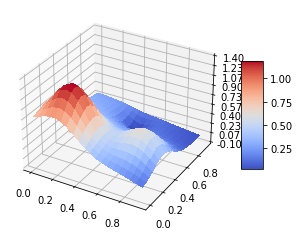

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [3]:
def create_X(x, y, n=1 ):
    '''from x, y meshgrid vectors computes the design matrix for a polynomial model of degree n.'''
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    
    for i in range(1,n+1):
        #starting from the index after the i-1 degree
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            #combinations of powers of x and y, starting from x**i
            X[:,q+k] = (x**(i-k))*(y**k)
            
    # The design matrix is set up as 1,x,y,x**2,x*y,y**2
    return X


## Part a)

### Set up data

- This is the data that we will use for all the program

In [108]:
#number of points for each axis
n_points = 70

#set random seed
np.random.seed(1234)
x0 = np.random.rand(n_points)

#set random seed
np.random.seed(4352)
y0 = np.random.rand(n_points)

#mesh arrays of x and y
x,y = np.meshgrid(x0,y0)

#create a dummy design matrix for the arrays of x and y
X0 = create_X(x,y)

#generate normal distributed noise 
noise_amp = 0.5
noise = noise_amp*np.random.randn(X0.shape[0])

#calculate starting target values with noise
z = FrankeFunction(X0[:,1],X0[:,2]) + noise


# The degree of the polynomial and the corresponding design matrix will be specific of each problem


In [109]:
X0

array([[1.        , 0.19151945, 0.64490921],
       [1.        , 0.62210877, 0.64490921],
       [1.        , 0.43772774, 0.64490921],
       ...,
       [1.        , 0.98200474, 0.19749049],
       [1.        , 0.1239427 , 0.19749049],
       [1.        , 0.1193809 , 0.19749049]])

array([0.60079527, 0.1525396 , 0.20991344, ..., 1.19889073, 0.63181714,
       0.63592888])

In [111]:
z

array([-0.43735267,  0.05285563,  0.20083414, ...,  1.25484128,
        1.2232238 ,  1.12404834])

In [112]:
f = FrankeFunction(H[:,1],H[:,2]) + noise
z-f

array([ 0.25055851, -0.67623022, -0.33113226, ...,  0.21207014,
        0.9725994 ,  0.97329781])

### Scaling the design matrix

_This rescales the features of the design matrix.
Should we do a comparison of with and without scaling?_

In [4]:
def MatrixScaler(X):
    for i in range(X.shape[1]):
        if np.std(X[:,i]) == 0:
            X[:,i] = (X[:,i]-np.mean(X[:,i]))
        else:
            X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    return X

### OLS regression 

In [10]:
def OLS(X_train, X_test, z_train, z_test):
    '''
    Fit the model with OLS regression using the train set and 
    returns the predicted values for both the train and the test set.
    '''
    
    #extract regression coefficients
    beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train
    
    #predict train and test values
    z_train_tilde_ols = X_train@beta_ols
    z_test_tilde_ols = X_test@beta_ols
    
    return z_train_tilde_ols, z_test_tilde_ols

The MSE test for OLS and degree  5
0.26329859389674315
0.2561384014005623
0.2056009316976658
0.1975917227744839


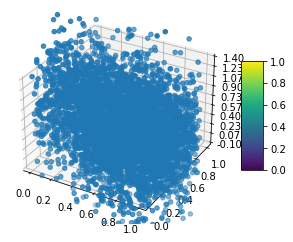

In [84]:

#degree of the polynomial
maxdegree = 5

#setup design matrix with polynomial model
X = create_X(x,y,maxdegree)


#split train and test set
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)

#apply OLS regression
z_train_tilde_ols, z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test)

#calculate train and test mse 
mse_train = mean_squared_error(z_train,z_train_tilde_ols)
mse_test = mean_squared_error(z_test,z_test_tilde_ols)

#calculate train and test r2
r2_train = r2_score(z_train,z_train_tilde_ols)
r2_test = r2_score(z_test,z_test_tilde_ols)

print("The MSE test for OLS and degree ",maxdegree)
print(mse_test)

print(mse_train)

print(r2_test)
print(r2_train)



fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.scatter3D(X[:,1],X[:,2], z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Part b)

### Analysis of MSE as a function of complexity

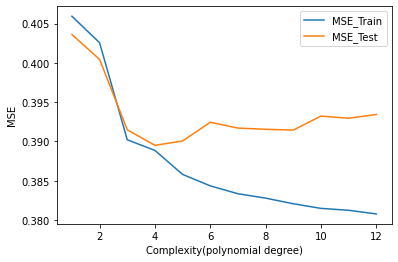

In [57]:

#maximum degree of polynomial
maxdegree = 12


#create arrays for results
polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,2))



#cycle on polynomial degrees

for degree in range(maxdegree):
    
    X = create_X(x,y,degree+1)
    
    X = MatrixScaler(X)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)

    z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree+1
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols)  
    

#plot the results
plt.plot(polydegree,MSE_OLS[:,0],label='MSE_Train')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Bootstrap method

In [5]:
#Important to split the data set before shuffling 
def bootstrap_OLS(X_train, X_test, z_train, z_test, n_bootstrap): 
    MSE = np.zeros((n_bootstrap,2))
    n = len(z_train)
    z_tilde_train_ols = np.empty((len(z_train), n_bootstrap))
    z_tilde_test_ols = np.empty((len(z_test), n_bootstrap))
    for i in range(n_bootstrap):
        sequence = np.random.randint(0,n,n)
        X1_train = X_train[sequence]
        z1_train = z_train[sequence]  
        z_tilde_train_ols[:,i] , z_tilde_test_ols[:,i] = OLS(X1_train, X_test, z1_train, z_test) 
        MSE[i,0] = mean_squared_error(z1_train,z_tilde_train_ols[:,i]) 
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test_ols[:,i])  
    return z_tilde_train_ols, z_tilde_test_ols, MSE
# From now on, index 0 corresponds to train and 1 to test

### Check of central limit theorem

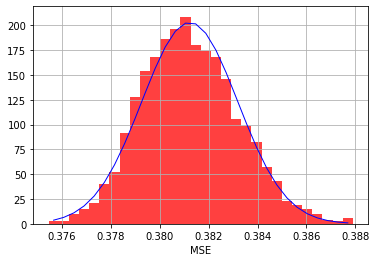

In [59]:
#number of resamplings
n_bootstrap = 3000


deg = 5
X = create_X(x,y,deg)
X = MatrixScaler(X)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)

#calculation of mse over the resamplings
_, _, mse_bs = bootstrap_OLS(X_train, X_test, z_train, z_test, n_bootstrap)
mse_bs_test = mse_bs[:,1]

n, binsboot, patches = plt.hist(mse_bs_test, density=True, bins=30, facecolor='red', alpha=0.75)

# Why does density = True show thousands in the height of the bins?
# shouldn't it be normalized ?

#add a 'best fit' line   

bincenters = np.mean(np.vstack([binsboot[0:-1],binsboot[1:]]), axis=0)

Norm = norm.pdf(bincenters, np.mean(mse_bs_test), np.std(mse_bs_test))
lt = plt.plot(bincenters, Norm, 'b', linewidth=1)

plt.xlabel('MSE')
plt.ylabel('')
plt.grid(True)
plt.show()

### Bias-variance tradeoff with bootstrap method

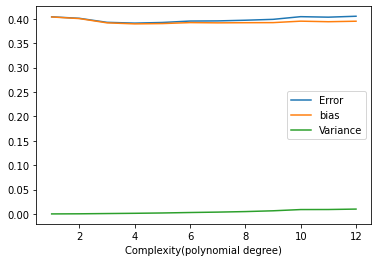

In [107]:
#maximum degree of polynomial
maxdegree = 12

#number of bootstrap resamplings
n_bs = 50


#create arrays for results
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
MSE_boot = np.zeros((maxdegree,2))



#cycle on polynomial degrees

for degree in range(maxdegree):
    
    X = create_X(x,y,degree + 1)
    
    X = MatrixScaler(X)
    
    # Why needed random_state
    # The random_seed makes sure we take the same indices for spliting every time, and it is necessary to test the same test set
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)

    _, z_pred, mse = bootstrap_OLS(X_train, X_test, z_train, z_test, n_bs )
    z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree+1
    error[degree] = np.mean( np.mean((z_t - z_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_t - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    
    MSE_boot[degree, 0] = np.mean(mse[:,0]) 
    MSE_boot[degree, 1] = np.mean(mse[:,1])   
    

#plot the results
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.xlabel('Complexity(polynomial degree)')

plt.legend()
plt.show()

### MSE analysis

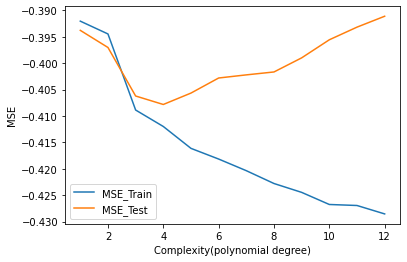

In [65]:
plt.figure()
plt.plot(polydegree,np.log10(MSE_boot[:,0]),label='MSE_Train')
plt.plot(polydegree,np.log10(MSE_boot[:,1]),label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Part c)

### Cross validation function

In [67]:
def cross_validation_OLS(k_folds, X,z):
    MSE = []
    kfold = KFold(n_splits = k_folds)
    for train_inds, test_inds in kfold.split(X):
        X_train = X[train_inds]
        z_train = z[train_inds]

        X_test = X[test_inds]
        z_test = z[test_inds]

        z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test)

        MSE.append(mean_squared_error(z_test, z_test_tilde_ols))

        return (np.mean(MSE))

### Division in k-folds

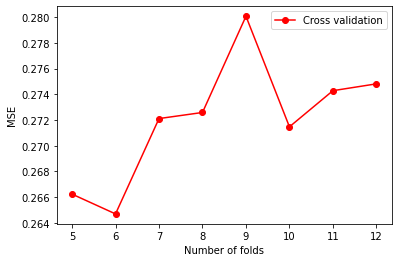

In [69]:
k_folds = range(5,13)
MSE_cross = np.zeros(len(k_folds))

maxdegree = 6
X = create_X(x,y,maxdegree)

for i in range(len(k_folds)):
    MSE_cross[i]=cross_validation_OLS(k_folds[i],X,z)

plt.figure()
plt.plot(k_folds,MSE_cross,"o-",c="r",label="Cross validation")
plt.xlabel('Number of folds')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Comparison cross-validation and bootstrap

In [71]:


maxdegree = 10


MSE_test_boot = np.zeros(maxdegree)

k_folds = [5,10]

MSE_cross = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    X = create_X(x,y,degree)
    X = MatrixScaler(X)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test)
    
    _, z_pred, mse = bootstrap_OLS(X_train, X_test, z_train, z_test, n_bs )
    z_t = z_test.reshape(len(z_test),1)
    MSE_test_boot[degree] = np.mean(mse[:,1])
    for i  in range(len(k_folds)):
        k = k_folds[i]
        MSE_cross[degree,i] = cross_validation_OLS(k,X,z)


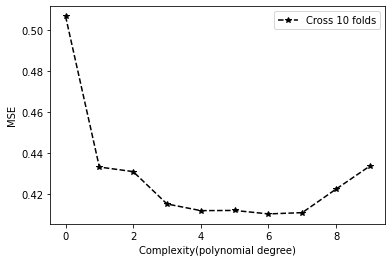

In [75]:
plt.figure()
plt.plot(range(maxdegree),MSE_test_boot,"o-",label = 'Bootstrap')
plt.plot(range(maxdegree),MSE_cross[:,0],"r*--", label ='Cross 5 folds' )
plt.plot(range(maxdegree),MSE_cross[:,1],"k*--", label = 'Cross 10 folds' )
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Part d)

### Ridge regression function

_Do we have to remove the intercept ? 
In all other cases we have kept it._

In [76]:
def Ridge(X_train,X_test,z_train,z_test,lambd):

    # Since it relates to remove intercepts, better to use built in function in SKL
    RegRidge = linear_model.Ridge(lambd,fit_intercept= True)
    
    #fit the model to the training data
    RegRidge.fit(X_train,z_train)
    # and then make the prediction
    z_tilde_train = RegRidge.predict(X_train)
    z_tilde_test = RegRidge.predict(X_test)
    
    return z_tilde_train, z_tilde_test

### Fitting with Ridge regression over different $\lambda$

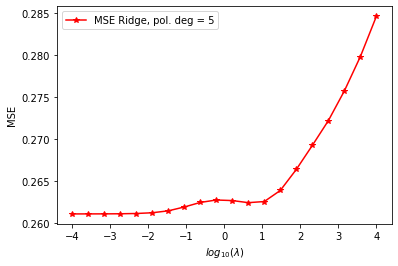

lambda to obtain miminum MSE: 0.0001
0.2610653925043879
0.2610670447356608
0.2610714270485165
0.2610831497704891
0.2611150217897326
0.26120281927387307
0.26143115703157427
0.26188866337481337
0.26243213924255326
0.26272572236352826
0.26265982116414993
0.26240901542329326
0.26254177412854335
0.26386290972710913
0.26637504789438554
0.269240576979898
0.27219752755377447
0.2757465292878613
0.2798495859965668
0.2846573421221715


In [83]:

#degree of the polynomial
maxdegree = 4

#setup design matrix with polynomial model
X = create_X(x,y,maxdegree)

X = MatrixScaler(X)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)


#define interval of lambdas
nlambdas = 20
lambd = np.logspace(-4, 4, nlambdas)

MSE_test_Ridge = np.zeros(len(lambd))

#
for i in range(len(lambd)):
    
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambd[i])
    
    MSE_test_Ridge[i] = mean_squared_error(z_test, z_tilde_test)
    

plt.figure()
plt.plot(np.log10(lambd), MSE_test_Ridge, 'r*-', label = 'MSE Ridge, pol. deg = {}'.format(deg))

plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('MSE')
plt.legend()
plt.show()
print('lambda to obtain miminum MSE:', lambd[np.argmin(MSE_test_Ridge)])
for i in range(len(lambd)):
    print(MSE_test_Ridge[i])

### Ridge regression with bootstrap

In [85]:
#Important to split the data set before shuffling 
def bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, lambd): 
    
    #prepare arrays for output
    MSE = np.zeros((n_bootstrap,2))
    z_tilde_train = np.zeros((len(z_train), n_bootstrap))
    z_tilde_test = np.zeros((len(z_test), n_bootstrap))
    
    n = len(z_train)
    
    #cycle on resamplings
    for i in range(n_bootstrap):
        
        #extract sequence for resampling
        sequence = np.random.randint(0,n,n)
        
        #resampled arrays
        X1_train = X_train[sequence]
        z1_train = z_train[sequence]
        
        #fit and predict
        z_tilde_train[:,i], z_tilde_test[:,i] = Ridge(X1_train, X_test, z1_train, z_test, lambd)
        
        #calculate mse on train and test
        MSE[i,0] = mean_squared_error(z1_train,z_tilde_train[:,i])
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test[:,i])

    return z_tilde_train, z_tilde_test, MSE

Graphs do not agree for $\lambda\sim0$ because of different approach with intercept between OLS and Ridge ?

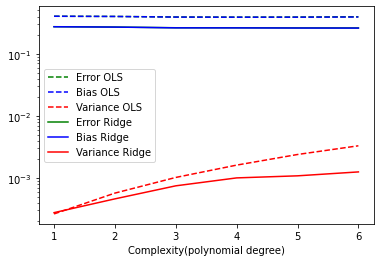

In [90]:


#select value of lambda
lambd = 10**-1


maxdegree = 6

n_bootstrap = 150

#prepare arrays for output

error_ols = np.zeros(maxdegree)
bias_ols = np.zeros(maxdegree)
variance_ols = np.zeros(maxdegree)

error_ridge = np.zeros(maxdegree)
bias_ridge = np.zeros(maxdegree)
variance_ridge = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

MSE_boot_ridge = np.zeros((maxdegree,2))
MSE_boot_ols = np.zeros((maxdegree,2))


#cycle on degrees of polynomial
for degree in range(maxdegree):
    
    #create design matrix (starting from degree 1)
    X = create_X(x,y,degree+1)
    #rescale design matrix
    X = MatrixScaler(X)
    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
 
    #
    _, z_pred_ols, mse_ols = bootstrap_OLS(X_train, X_test,z_train, z_test, n_bootstrap)
    _, z_pred_ridge, mse_ridge = bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, lambd)
    
    #reshape test values
    z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree + 1
    
    #calculate error, bias, variance for Ridge regression
    error_ridge[degree] = np.mean( np.mean((z_t - z_pred_ridge)**2, axis=1, keepdims=True) )
    bias_ridge[degree] = np.mean( (z_t - np.mean(z_pred_ridge, axis=1, keepdims=True))**2 )
    variance_ridge[degree] = np.mean( np.var(z_pred_ridge, axis=1, keepdims=True) )
    
    #calculate error, bias, variance for OLS regression
    error_ols[degree] = np.mean( np.mean((z_t - z_pred_ols)**2, axis=1, keepdims=True) )
    bias_ols[degree] = np.mean( (z_t - np.mean(z_pred_ols, axis=1, keepdims=True))**2 )
    variance_ols[degree] = np.mean( np.var(z_pred_ols, axis=1, keepdims=True) )

    MSE_boot_ols[degree, 0] = np.mean(mse_ols[:,0]) 
    MSE_boot_ols[degree, 1] = np.mean(mse_ols[:,1]) 
    
    MSE_boot_ridge[degree, 0] = np.mean(mse_ridge[:,0]) 
    MSE_boot_ridge[degree, 1] = np.mean(mse_ridge[:,1])  
 
    
plt.plot(polydegree, error_ols, "--g" , label='Error OLS')
plt.plot(polydegree, bias_ols,"--b", label='Bias OLS')
plt.plot(polydegree, variance_ols, "--r", label='Variance OLS')

plt.plot(polydegree, error_ridge, "g", label='Error Ridge')
plt.plot(polydegree, bias_ridge, "b", label='Bias Ridge')
plt.plot(polydegree, variance_ridge, "r", label='Variance Ridge')

plt.xlabel('Complexity(polynomial degree)')

plt.yscale("log")

plt.legend()
plt.show()

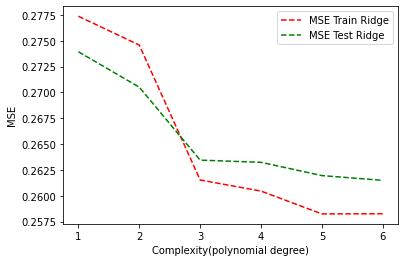

In [94]:
plt.figure()
#plt.plot(polydegree,MSE_boot_ols[:,0],"r",label='MSE Train OLS')
#plt.plot(polydegree,MSE_boot_ols[:,1],"g",label='MSE Test OLS')

plt.plot(polydegree,MSE_boot_ridge[:,0],"r--",label='MSE Train Ridge')
plt.plot(polydegree,MSE_boot_ridge[:,1],"g--",label='MSE Test Ridge')

plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')

#plt.yscale("log")

plt.legend()
plt.show()

In [99]:
nlambdas = 20
lambd = np.logspace(-4, 4, nlambdas)
max_degree = np.arange(1,10,1)
datapoints = 100
MSE_test_BRidge = np.zeros((len(lambd), len(max_degree)))
for degree in range(len(max_degree)):
    X = create_X(x,y,max_degree[degree])
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    for i in range(len(lambd)):
        _,_,MSE_BRidge = bootstrap_Ridge(X_train, X_test,z_train, z_test, datapoints, lambd[i])
        MSE_test_BRidge[i,degree] = np.mean(MSE_BRidge[:,1]) # for test data set only

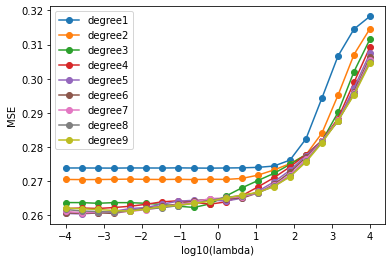

In [100]:
plt.figure()
for degree in range(len(max_degree)):
    plt.plot(np.log10(lambd), MSE_test_BRidge[:,degree], 'o-', label='degree' + str(max_degree[degree]))
plt.legend()
#plt.legend(list(map(str, + (max_degree))) )
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')   
plt.show()

### Ridge regression with cross-validation 

In [101]:
def cross_validation_Ridge(k_folds, X, z, lambd):
    MSE = []
    kfold = KFold(n_splits = k_folds)
    for train_inds, test_inds in kfold.split(X):
        X_train = X[train_inds]
        z_train = z[train_inds]

        X_test = X[test_inds]
        z_test = z[test_inds]

        _, z_tilde_test = Ridge( X_train, X_test, z_train, z_test, lambd)

        MSE.append(mean_squared_error(z_test,z_tilde_test))

        return (np.mean(MSE))

In [104]:
lambd = 10
maxdegree = 12
n_bootstrap = 100



MSE_test_boot = np.zeros(maxdegree)
k_folds = [5,10]
MSE_cross = np.zeros((maxdegree,2))
poly_degree = np.zeros(maxdegree)
for degree in range(maxdegree):
    X = create_X(x,y,degree+1)
    poly_degree[degree] = degree + 1
    X = MatrixScaler(X)

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    
    _, _, mse = bootstrap_Ridge(X_train, X_test, z_train, z_test,n_bootstrap, lambd)

    MSE_test_boot[degree] = np.mean(mse[:,1])
    
    for i  in range(len(k_folds)):
        k = k_folds[i]
        MSE_cross[degree,i] = cross_validation_Ridge(k,X,z,lambd)




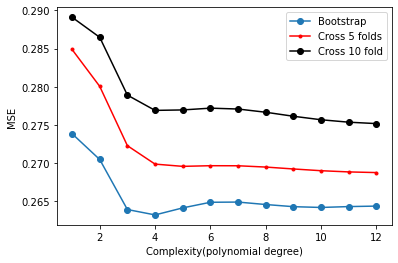

In [105]:
plt.figure()
plt.plot(poly_degree,MSE_test_boot,"o-",label = 'Bootstrap')
plt.plot(poly_degree,MSE_cross[:,0],"r.-", label ='Cross 5 folds' )
plt.plot(poly_degree,MSE_cross[:,1],"ko-", label = 'Cross 10 fold' )
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [29]:
degree = 5
X = create_X(x,y,degree)
nlambdas = 20
lambd = np.logspace(-4, 4, nlambdas)
k_folds = np.arange(5,25,5)
datapoints = 100
MSE_test_CRidge = np.zeros((len(lambd), len(k_folds)))
for k in range(len(k_folds)):
    for i in range(len(lambd)):
        MSE_CRidge = cross_validation_Ridge(k_folds[k],X,z, lambd[i])
        MSE_test_CRidge[i,k] = MSE_CRidge # for test data set only

Text(0, 0.5, 'MSE')

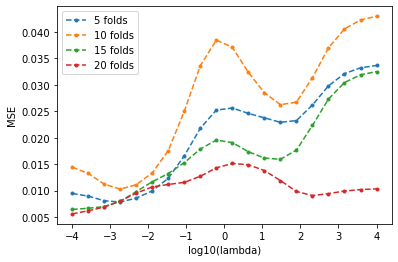

In [30]:
plt.figure()
for k in range(len(k_folds)):
    plt.plot(np.log10(lambd), MSE_test_CRidge[:,k], '.--', label= str(k_folds[k]) + ' folds')
plt.legend()
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')  

## Part e)

### Loading the Boston Housing dataset

In [6]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['MEDV'] = boston_data.target

In [7]:
features = boston_df.columns.tolist() 
print(features[:-1])

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Fitting a simple model with OLS and find appropriate degree of polynomial

All features are included in the model here

In [8]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


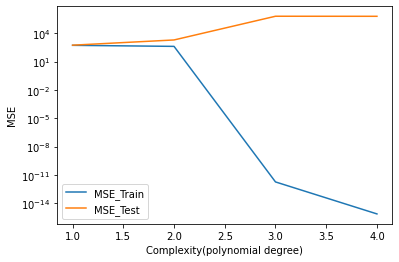

In [17]:
#degree of the polynomial model
maxdegree = 4

#target feature
z = boston_df['MEDV']
x = boston_df[features[:-1]] # original features

polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    #set up the model
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    X = MatrixScaler(X)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    
    #z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree+1
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols)  

#plot the results
plt.plot(polydegree,MSE_OLS[:,0],label='MSE_Train')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()


### Feature selection given the correlation matrix

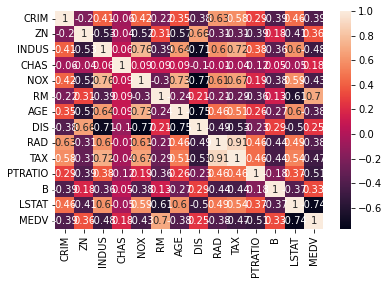

In [18]:
#print the correlation matrix
corr_matrix = boston_df.corr().round(2)
#sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=corr_matrix, annot=True)
array_corr = corr_matrix["MEDV"].abs()

In [19]:
def drop_columns(thres_corr):
    ''' Function takes in a value of thresholding and return the filtered dataframe, excluding already the target columns'''
    thresh_index = np.where((array_corr> thres_corr) == False)
    col_indi = np.append(thresh_index[0],13) # add target column
    filtered_boston = boston_df.drop(boston_df.columns[col_indi], axis=1)  
    return filtered_boston

In [21]:
filtered_boston = drop_columns(0.3)
filtered_boston

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,1.0,273.0,21.0,393.45,6.48


Now the features in the model are only the most correlated with the target feature

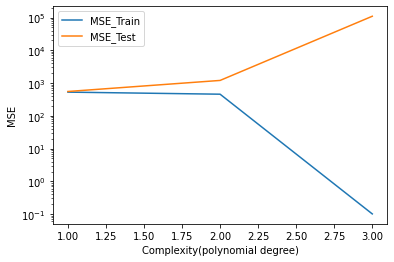

In [22]:
maxdegree = 3

z = boston_df['MEDV']

polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(filtered_boston)
    
    X = MatrixScaler(X)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    
    #z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree+1
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols)  

#plot the results
plt.plot(polydegree,MSE_OLS[:,0],label='MSE_Train')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()


### Compare the effect of different values of correlation threshold

In [23]:
# can not remove all the columns, then need an upper limint
max_corr = np.max(array_corr*(array_corr < 1))
print('Upper thresholding of correlation is: ', max_corr)
min_corr = np.min(array_corr*(array_corr > 0))
print('Lower thresholding of correlation is: ', min_corr)

Upper thresholding of correlation is:  0.74
Lower thresholding of correlation is:  0.18


In [11]:
degree = 3

z = boston_df['MEDV']

thresh = np.arange(min_corr, max_corr, 0.1)

MSE_OLS = np.zeros((len(thresh),2))
poly = PolynomialFeatures(degree)
for i in range(len(thresh)):
    
    filtered_boston = drop_columns(thresh[i])
    
    X = poly.fit_transform(filtered_boston)
    
    X = MatrixScaler(X)

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 
    
    MSE_OLS[i, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[i, 1] = mean_squared_error(z_test,z_test_tilde_ols)  



NameError: name 'min_corr' is not defined

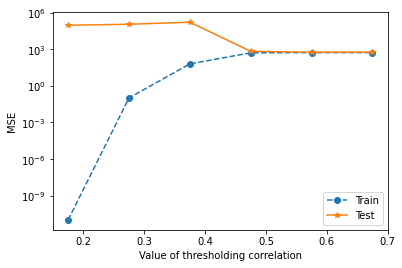

In [40]:
#plot the results

plt.plot(thresh, MSE_OLS[:,0],'o--', label='Train')
plt.plot(thresh,MSE_OLS[:,1], '*-', label='Test')

plt.xlabel('Value of thresholding correlation')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend(loc = 'lower right')
plt.show()

In [41]:
max_degree = 3
degree = 3

z = boston_df['MEDV']

thresh = np.arange(0.2, max_corr, 0.1)
MSE_OLS = np.zeros((len(thresh),2))
polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,len(thresh),2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    for i in range(len(thresh)):

        filtered_boston = drop_columns(thresh[i])

        X = poly.fit_transform(filtered_boston)

        X = MatrixScaler(X)

        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)

        z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 

        MSE_OLS[degree,i, 0] = mean_squared_error(z_train,z_train_tilde_ols)
        MSE_OLS[degree,i, 1] = mean_squared_error(z_test,z_test_tilde_ols)  


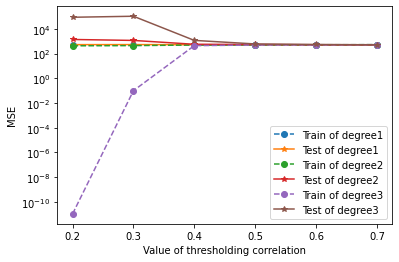

In [42]:
for degree in range(maxdegree):
    plt.plot(thresh, MSE_OLS[degree,:,0],'o--', label='Train of degree' + str(degree + 1))
    plt.plot(thresh,MSE_OLS[degree,:,1], '*-', label='Test of degree' + str(degree + 1))

plt.xlabel('Value of thresholding correlation')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend(loc = 'lower right')
plt.show()
    

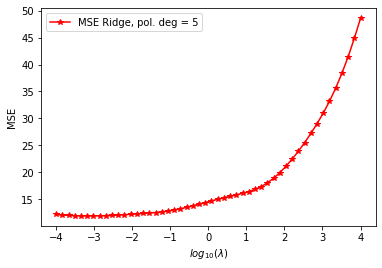

In [43]:
degree = 2
filtered_boston = drop_columns(0.4)
poly = PolynomialFeatures(degree+1)
    
X = poly.fit_transform(filtered_boston)
    
X = MatrixScaler(X)
    
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)

#define interval of lambdas
nlambdas = 50
lambd = np.logspace(-4, 4, nlambdas)

MSE_test_Ridge = np.zeros(len(lambd))

#
for i in range(len(lambd)):
    _,z_tilde_test = Ridge(X_train, X_test, z_train, z_test, lambd[i],)
    MSE_test_Ridge[i] = mean_squared_error(z_test, z_tilde_test)
    

plt.figure()
plt.plot(np.log10(lambd), MSE_test_Ridge, 'r*-', label = 'MSE Ridge, pol. deg = {}'.format(deg))

lambda_min = lambd[MSE_test_Ridge.argmin()]

plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [44]:
lambda_min

0.0006551285568595509

In [45]:
maxdegree = 5

z = boston_df['MEDV']

polydegree = np.zeros(maxdegree)
MSE_ridge = np.zeros((maxdegree,2))
MSE_OLS = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(filtered_boston)
    
    X = MatrixScaler(X)
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
    
    #z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree+1
    
    z_pred_train, z_pred_test = Ridge( X_train, X_test, z_train, z_test, lambda_min) 
    
    MSE_ridge[degree,0] = mean_squared_error(z_train,z_pred_train)
    MSE_ridge[degree,1] = mean_squared_error(z_test,z_pred_test)
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train, z_test) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols)  

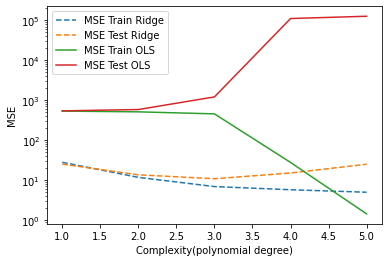

In [46]:
#plot the results
plt.plot(polydegree,MSE_ridge[:,0],"--",label='MSE Train Ridge')
plt.plot(polydegree,MSE_ridge[:,1],"--",label='MSE Test Ridge')
plt.plot(polydegree,MSE_OLS[:,0],label='MSE Train OLS')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE Test OLS')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()

### Fitting a simple model with Ridge and find appropriate degree of polynomial

a) Working with all 13 original features

In [47]:
#degree of the polynomial model
maxdegree = 3
nlambdas = 5
lambd = np.logspace(-2, 4, nlambdas)

#target feature
z = boston_df['MEDV']
x = boston_df[features[:-1]] # original features
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
polydegree = np.zeros(maxdegree)
MSE_Ridge_train = np.zeros((maxdegree,len(lambd)))
MSE_Ridge_test = np.zeros((maxdegree,len(lambd)))

for degree in range(maxdegree):
        poly = PolynomialFeatures(degree+1)
        X = poly.fit_transform(x)
        X = MatrixScaler(X)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
        #z_t = z_test.reshape(len(z_test),1)
        polydegree[degree] = degree+1
        for i in range(len(lambd)):
            z_train_tilde_Ridge , z_test_tilde_Ridge = Ridge(X_train, X_test, z_train, z_test, lambd[i]) 
            MSE_Ridge_train[degree, i] = mean_squared_error(z_train,z_train_tilde_Ridge)
            MSE_Ridge_test[degree, i] = mean_squared_error(z_test,z_test_tilde_Ridge)  

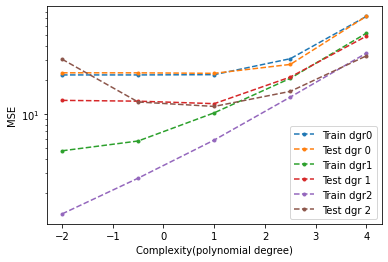

In [49]:
#plot the results
for i in range(maxdegree):
    plt.plot(np.log10(lambd),MSE_Ridge_train[i,:],'.--', label='Train'+ ' dgr'+ str(i))
    plt.plot(np.log10(lambd),MSE_Ridge_test[i,:], '.--', label='Test' + ' dgr '+ str(i))

plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend(loc = 'lower right')
plt.show()

b) Only high correlated features
there is just slightly change in the number of features to create the design matrix => but huge change in design matrix

In [50]:
#degree of the polynomial model
filtered_boston = drop_columns(0.4)
maxdegree = 3
nlambdas = 5
lambd = np.logspace(-2, 4, nlambdas)

#target feature
z = boston_df['MEDV']
polydegree = np.zeros(maxdegree)
MSE_Ridge_train_ = np.zeros((maxdegree,len(lambd)))
MSE_Ridge_test_ = np.zeros((maxdegree,len(lambd)))

for degree in range(maxdegree):
        poly = PolynomialFeatures(degree+1)
        X = poly.fit_transform(filtered_boston) # i just changed this point
        X = MatrixScaler(X)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 2)
        #z_t = z_test.reshape(len(z_test),1)
        polydegree[degree] = degree+1
        for i in range(len(lambd)):
            z_train_tilde_Ridge , z_test_tilde_Ridge = Ridge( X_train, X_test, z_train, z_test, lambd[i]) 
            MSE_Ridge_train_[degree, i] = mean_squared_error(z_train,z_train_tilde_Ridge)
            MSE_Ridge_test_[degree, i] = mean_squared_error(z_test,z_test_tilde_Ridge)  


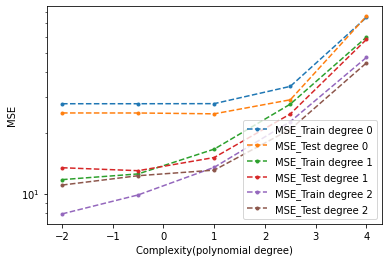

In [51]:
#plot the results
for i in range(maxdegree):
    plt.plot(np.log10(lambd),MSE_Ridge_train_[i,:],'.--', label='MSE_Train'+ ' degree '+ str(i))
    plt.plot(np.log10(lambd),MSE_Ridge_test_[i,:], '.--', label='MSE_Test' + ' degree '+ str(i))

plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend(loc = 'lower right')
plt.show()
